# Day 14

In [62]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter

%matplotlib inline

In [2]:
#To read in the dataset and replace the missing values
df = pd.read_csv('breast-cancer-wisconsin-merged.txt')
df.replace('?', -99999, inplace=True)

# Removing unuseful features from the data
df.drop(['id'], axis=1, inplace=True)
df_classic = df.copy()


# Spliting the data
from sklearn.model_selection import train_test_split

X = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [3]:
# Instanstiating, fitting and testing the classifier
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
accuracy

0.9828571428571429

In [4]:
# Creating a random data for prediction and making a prediction

example_measure = np.array([[4,2,1,1,1,2,3,2,3],[4,2,8,1,1,7,3,2,1],
                            [4,2,8,3,1,7,3,2,1],[4,2,3,1,1,7,3,2,1]], dtype='object')
prediction = clf.predict(example_measure)
prediction

array([2, 4, 4, 2], dtype=int64)

# Day 15

#### Euclidean Distances

In [5]:
# Creating plots which we will calculate the euclidean distance
import math

plot1 = [1,3]
plot2 = [2,5]

euclidean_distance = math.sqrt( (plot1[0] - plot2[0])**2 + (plot1[1] - plot2[1])**2 )
euclidean_distance

2.23606797749979

In [75]:
def euclid_dist(plt1,plt2):
    from math import sqrt
    
    try:
        if len(plt1) == len(plt2):
            n = len(plt1)
            euclid_dist_list = []
        for a in range(n):
            point = (plt1[a] - plt2[a])**2
            euclid_dist_list.append(point)
        euclid_dist = sqrt( sum( euclid_dist_list ) )
        return euclid_dist
    except UnboundLocalError:
        warnings.warn(f'Dimension Mismatch: {plt1} and {plt2} have unequal dimensions')
        pass
    
    
    return 

In [76]:
test1 = [1,2,5,8,7]
test2 = [2,4,7,8,4,2]

euclid_dist(test1, test2)

C:\Users\NGabriel\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Dimension Mismatch: [1, 2, 5, 8, 7] and [2, 4, 7, 8, 4, 2] have unequal dimensions
  


# euclid_dist(plot1,plot2)

# Day 16 - 19

#### Coding the KNearestNeighbors Algorithm from scratch

In [18]:
#uncomment the line below to use on the plot,
#the code below adds gridlines to the plot

style.use('fivethirtyeight')

In [10]:
# To creat an examplary dataset for the algorithm

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

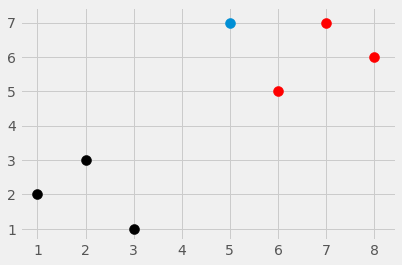

In [19]:
# Creating a list comprehension that plots the different data groups in the dataset

[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

In [12]:
# Definig the KNeighbors function

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than the total voting groups!')
        
    distances = []  #distance between data points and a supposed prediction
    for group in data:
        for features in data[group]:
            euclid_dist = np.linalg.norm(np.array(features)-np.array(predict)) #numpy way of calculating euclidean distances
            distances.append([euclid_dist, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k

    
    return vote_result

In [13]:
result = k_nearest_neighbors(dataset, new_features, k=3)
result

'r'

In [14]:
#Testing out our algorithm on the breast cancer data and cross validating in the process

import random

accuracies = []
for i in range(25):
    full_classic_df = df_classic.astype(float).values.tolist()
    #full_classic_df
    random.shuffle(full_classic_df)

    test_size = 0.2
    train_set = {2:[], 4:[]}
    test_set = {2:[], 4:[]}
    train_data = full_classic_df[:-int(test_size*len(full_classic_df))]
    test_data = full_classic_df[-int(test_size*len(full_classic_df)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])

    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote = k_nearest_neighbors(train_set, data, k=5)
            if group == vote:
                correct +=1
            total +=1

    print("Accuracy: ", correct/total)
    accuracies.append(correct/total)
    
print('Mean Accuracy: ', sum(accuracies)/len(accuracies))

Accuracy:  0.9856115107913669
Accuracy:  0.9784172661870504
Accuracy:  0.9640287769784173
Accuracy:  0.9784172661870504
Accuracy:  0.9568345323741008
Accuracy:  0.9640287769784173
Accuracy:  0.9784172661870504
Accuracy:  0.9712230215827338
Accuracy:  0.9640287769784173
Accuracy:  0.9712230215827338
Accuracy:  0.9640287769784173
Accuracy:  0.9784172661870504
Accuracy:  0.9856115107913669
Accuracy:  0.9856115107913669
Accuracy:  0.9712230215827338
Accuracy:  0.9496402877697842
Accuracy:  0.9640287769784173
Accuracy:  0.9856115107913669
Accuracy:  0.9640287769784173
Accuracy:  0.9784172661870504
Accuracy:  0.9712230215827338
Accuracy:  0.9856115107913669
Accuracy:  0.9712230215827338
Accuracy:  0.9784172661870504
Accuracy:  0.9568345323741008
Mean Accuracy:  0.9720863309352517


# Day 20 - 29

### Support Vector Machines (SVM)

In [15]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_acc = svm_clf.score(X_test, y_test)
svm_acc

0.9428571428571428

#### Coding a Support Vector Machine from the scratch

In [2]:
#uncomment the line below to use on the plot,
#the code below adds gridlines to the plot

style.use('ggplot')

In [39]:
# Coding the SVM class

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = { 1:'r', -1:'b' }
        
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
            
    def fit(self, data):
        #trains the model
        self.data = data   #gets the data
        
        #{ ||w||: [w,b] }
        opt_dict = {}
        
        transforms = [[1, 1],
                      [-1, 1],
                      [-1, -1],
                      [1, -1]]
        
        all_data = []
        for yi in self.data:
            for feature_set in self.data[yi]:
                for feature in feature_set:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        ## support vectors -- yi(xi.w+b) = 1
        
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      #point of expense
                      self.max_feature_value * 0.001]
        
        # extremely expensive
        b_range_multiple = 5
        #we don't need to take as small steps with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            #we can do this because convex
            optimized = False
            
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        #weakest link in the SVM fundamentality
                        #SMO attempts to fix this a bit
                        # ### yi( xi.w+b ) >= 1
                        
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                                
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                            
                    if w[0] < 0:
                        optimized = True
                        print('Optimized a step.')
                    else:
                        w = w - step
                        
                norms = sorted([n for n in opt_dict])
                ## ||w|| : [w,b]
                opt_choice = opt_dict[norms[0]]
                
                self.w = opt_choice[0]
                self.b = opt_choice[1]
                latest_optimum = opt_choice[0][0]+step*2
                
            
            for i in self.data:
                for xi in self.data[i]:
                    yi = i
                    print(xi, ':', yi*(np.dot(self.w,xi)+self.b))
            
                
    
    def predict(self, features):
        # Makes a prediction using the features
        '''
        *** sign( x.w+b )
        '''
        classification = np.sign( np.dot(np.array(features), np.array(self.w)) + self.b )
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, 
                            marker='*', c=self.colors[classification])
        
        return classification
    
    def visualize(self):
        [ [self.ax.scatter(x[0], x[1], s=100, color=self.colors[i]) for x in data_dict[i]]
          for i in data_dict ]
        
        # Hyperplane = w.x + b
        # v = w.x + b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]
        
        datarange = ( self.min_feature_value*0.9,
                      self.max_feature_value*1.1 )
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]
        
        # (w.x + b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot( [hyp_x_min, hyp_x_max], [psv1, psv2], 'k' )
        
        # (w.x + b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot( [hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k' )
        
        # (w.x + b) = 0
        # decision boundary support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot( [hyp_x_min, hyp_x_max], [db1, db2], 'y--' )
        

In [33]:
# Creating a random data to train the SVM

data_dict = {-1:np.array([[1, 7],
                         [2, 8],
                         [3, 8],]),
            1:np.array([[5, 1],
                       [6, -1],
                       [7, 3],])}

Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 4.799999999999098
[2 8] : 4.799999999999098
[3 8] : 3.9999999999992486
[5 1] : 3.199999999999399
[ 6 -1] : 5.599999999998948
[7 3] : 3.199999999999399
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a s

Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized 

Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized a step.
Optimized 

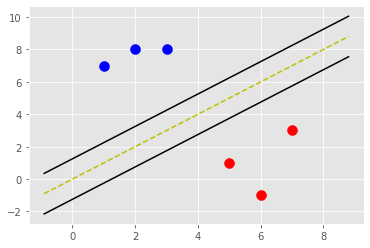

In [40]:
# Instantiating the svm object

svm = Support_Vector_Machine()
svm.fit(data=data_dict)
svm.visualize()

# Day 30 - 32

## Kernels

##### Coding the Kernels SVM Kernels class from scratch

In [59]:
#
#
#
#
#
#

import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers as solver

def linear_kernel( x1, x2 ):
    return np.dot( x1, x2 )

def polynomial_kernel( x, y, p=3 ):
    return ( 1 + np.dot(x, y) ) ** p

def gaussian_kernel( x, y, sigma=5.0 ):
    return np.exp( -linalg.norm(x-y)**2 / (2 * (sigma ** 2)) )


class SVM( object ):
    
    def __init__( self, kernel=linear_kernel, C=None ):
        self.kernel = kernel
        self.C = C
        if self.C is not None:
            self.C = float( self.C )
            
            
    def fit( self, X, y ):
        n_samples, n_features = X.shape
        
        ### Gram Matrix
        K = np.zeros( (n_samples, n_samples) )
        for i in range( n_samples ):
            for j in range( n_samples ):
                K[ i, j] = self.kernel( X[i], X[j] )
                
        
        P = cvxopt.matrix( np.outer(y, y) * K )
        q = cvxopt.matrix( np.ones(n_samples) * -1 )
        A = cvxopt.matrix( y, (1, n_samples) )
        b = cvxopt.matrix(0.0)
        
        if self.C is None:
            G = cvxopt.matrix( np.diag(np.ones(n_samples) * -1) )
            h = cvxopt.matrix( np.zeros(n_samples) )
        else:
            tmp1 = np.diag( np.ones(n_samples) * -1 )
            tmp2 = np.identity( n_samples )
            G = cvxopt.matrix( np.vstack((tmp1, tmp2)) )
            tmp1 = np.zeros( n_samples )
            tmp2 = np.ones( n_samples )
            h = cvxopt.matrix( np.hstack((tmp1, tmp2)) )
            
        ### Solve Qp problem
        solution = solver.qp( P, q, G, h, A, b )
        
        ### Lagrange Multipliers
        a = np.ravel( solution['x'] )
        
        ### Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange( len(a) )[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print( f"{len(self.a)} support vectors out of {n_samples} points" )
        
        ### Intercept
        self.b = 0
        for n in range( len(self.a) ):
            self.b += self.sv_y[n]
            self.b -= np.sum( self.a * self.sv_y * K[ind[n], sv] )
        self.b /= len( self.a )
            
        ### Weight Vector
        if self.kernel == linear_kernel:
            self.w = np.zeros( n_features )
            for n in range( len(self.a) ):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
            
            
    def project( self, X ):
        if self.w is not None:
            return np.dot( X, self.w ) + self.b
        else:
            y_predict = np.zeros( len(X) )
            for i in range( len(X) ):
                s = 0
                for a, sv_y, sv in zip( self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel( X[i], sv )
                y_predict[i] = s
            return y_predict + self.b
        
    def predict( self, X ):
        return np.sign( self.project(X) )
    

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    
    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array( [0, 2] )
        mean2 = np.array( [2, 0] )
        cov = np.array( [[0.8, 0.6],
                         [0.6, 0.8]] )
        X1 = np.random.multivariate_normal( mean1, cov, 100 )
        y1 = np.ones( len(X1) )
        X2 = np.random.multivariate_normal( mean2, cov, 100 )
        y2 = np.ones( len(X2) ) * -1
        return X1, y1, X2, y2
    
    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0, 0.8],
               [0.8, 1.0]]
        X1 = np.random.multivariate_normal( mean1, cov, 50 )
        X1 = np.vstack( ( X1, np.random.multivariate_normal( mean3, cov, 50 ) ) )
        y1 = np.ones( len(X1) )
        X2 = np.random.multivariate_normal( mean2, cov, 50 )
        X2 = np.vstack( ( X2, np.random.multivariate_normal( mean4, cov, 50 ) ) )
        y2 = np.ones( len(X2) ) * -1
        return X1, y1, X2, y2
    
    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array( [0, 2] )
        mean2 = np.array( [2, 0] )
        cov = np.array( [[1.5, 1.0],
                         [1.0, 1.5]] )
        X1 = np.random.multivariate_normal( mean1, cov, 100 )
        y1 = np.ones( len(X1) )
        X2 = np.random.multivariate_normal( mean2, cov, 100 )
        y2 = np.ones( len(X2) ) * -1
        return X1, y1, X2, y2
    
    def split_train( X1, y1, X2, y2 ):
        X1_train = X1[ :90 ]
        y1_train = y1[ :90 ]
        X2_train = X2[ :90 ]
        y2_train = y2[ :90 ]
        X_train = np.vstack( (X1_train, X2_train) )
        y_train = np.hstack( (y1_train, y2_train) )
        return X_train, y_train
    
    def split_test( X1, y1, X2, y2 ):
        X1_test = X1[ 90: ]
        y1_test = y1[ 90: ]
        X2_test = X2[ 90: ]
        y2_test = y2[ 90: ]
        X_test = np.vstack( (X1_test, X2_test) )
        y_test = np.hstack( (y1_test, y2_test) )
        return X_test, y_test
    
    def plot_margin( X1_train, X2_train, clf ):
        def f( x, w, b, c=0 ):
            # given x, return y such that [x, y] in on the line
            # w.x + b = c
            return ( -w[0] * x - b + c ) / w[1]
        
        plt.plot( X1_train[:,0], X1_train[:,1], "ro" )
        plt.plot( X2_train[:,0], X2_train[:,1], "bo" )
        plt.scatter( clf.sv[:,0], clf.sv[:,1], s=100, c="g" )
        
        # w.x + b = 0
        a0 = -4
        a1 = f( a0, clf.w, clf.b )
        b0 = 4
        b1 = f( b0, clf.w, clf.b )
        plt.plot( [a0, b0], [a1, b1], "y--" )
        
        # w.x + b = 1
        a0 = -4
        a1 = f( a0, clf.w, clf.b, 1 )
        b0 = 4
        b1 = f( b0, clf.w, clf.b, 1 )
        plt.plot( [a0, b0], [a1, b1], "k" )
        
        # w.x + b = -1
        a0 = -4
        a1 = f( a0, clf.w, clf.b, -1 )
        b0 = 4
        b1 = f( b0, clf.w, clf.b, -1 )
        plt.plot( [a0, b0], [a1, b1], "k" )
        
        plt.axis( "tight" )
        plt.show()
        
    def plot_contour( X1_train, X2_train, clf ):
        plt.plot( X1_train[:,0], X1_train[:,1], "ro" )
        plt.plot( X2_train[:,0], X2_train[:,1], "bo" )
        plt.scatter( clf.sv[:,0], clf.sv[:,1], s=100, c="g" )
        
        X1, X2 = np.meshgrid( np.linspace( -6, 6, 50 ), np.linspace( -6, 6, 50) )
        X = np.array( [[x1, x2] for x1, x2 in zip( np.ravel(X1), np.ravel(X2) )] )
        Z = clf.project( X ).reshape( X1.shape )
        plt.contour( X1, X2, Z, [0.0], colors='grey', linewidths=1, origin='lower' )
        plt.contour( X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower' )
        plt.contour( X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower' )
        
        plt.axis( "tight" )
        plt.show()
        
    
    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train( X1, y1, X2, y2 )
        X_test, y_test = split_test( X1, y1, X2, y2 )
        
        clf = SVM()
        clf.fit( X_train, y_train )
        
        y_predict = clf.predict( X_test )
        correct = np.sum( y_predict == y_test )
        print( f"{correct} out of {len(y_predict)} predictions correct" )
        
        plot_margin( X_train[y_train==1], X_train[y_train==-1], clf )
        
        
    def test_non_linear( kernel ):
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train( X1, y1, X2, y2 )
        X_test, y_test = split_test( X1, y1, X2, y2 )
        

        clf = SVM( kernel )
        clf.fit( X_train, y_train )
        
        y_predict = clf.predict( X_test )
        correct = np.sum( y_predict == y_test )
        print( f"{correct} out of {len(y_predict)} predictions correct" )
        
        plot_contour( X_train[y_train==1], X_train[y_train==-1], clf )
        
        
    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train( X1, y1, X2, y2 )
        X_test, y_test = split_test( X1, y1, X2, y2 )
        
        clf = SVM(C=1000.1)
        clf.fit( X_train, y_train )
        
        y_predict = clf.predict( X_test )
        correct = np.sum( y_predict == y_test )
        print( f"{correct} out of {len(y_predict)} predictions correct" )
        
        plot_contour( X_train[y_train==1], X_train[y_train==-1], clf )
        
        

     pcost       dcost       gap    pres   dres
 0: -1.6576e+01 -2.9930e+01  5e+02  2e+01  2e+00
 1: -1.8579e+01 -7.9985e+00  8e+01  4e+00  3e-01
 2: -1.4105e+01 -5.5703e+00  5e+01  2e+00  2e-01
 3: -5.5710e+00 -3.7007e+00  1e+01  4e-01  4e-02
 4: -3.3137e+00 -3.8393e+00  1e+01  3e-01  3e-02
 5: -3.0221e+00 -3.3747e+00  2e+00  5e-02  4e-03
 6: -2.9928e+00 -3.2883e+00  3e-01  6e-15  1e-15
 7: -3.2664e+00 -3.2731e+00  7e-03  5e-15  2e-15
 8: -3.2728e+00 -3.2729e+00  7e-05  1e-16  2e-15
 9: -3.2729e+00 -3.2729e+00  7e-07  1e-15  2e-15
Optimal solution found.
3 support vectors out of 180 points
20 out of 20 predictions correct


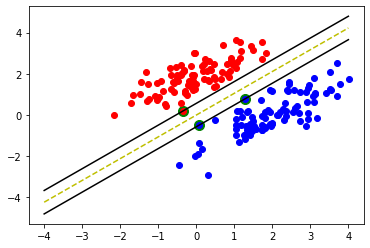

In [61]:
test_linear()

     pcost       dcost       gap    pres   dres
 0: -4.0549e+01 -9.9325e+01  1e+03  3e+01  2e+00
 1: -7.6476e+01 -1.0309e+02  7e+02  2e+01  1e+00
 2: -4.0722e+01 -1.8703e+01  3e+02  6e+00  4e-01
 3: -4.3554e+01 -1.4653e+01  2e+02  4e+00  3e-01
 4: -1.3951e+01 -1.6400e+00  2e+01  5e-01  4e-02
 5: -2.1266e+00 -1.0803e+00  3e+00  5e-02  4e-03
 6: -1.0710e+00 -9.6267e-01  6e-01  1e-02  8e-04
 7: -9.2131e-01 -8.6104e-01  4e-01  5e-03  4e-04
 8: -8.1403e-01 -7.6322e-01  3e-01  3e-03  2e-04
 9: -7.9771e-01 -7.7079e-01  3e-01  3e-03  2e-04
10: -7.5671e-01 -7.5774e-01  1e-01  1e-03  9e-05
11: -7.3750e-01 -7.4514e-01  7e-02  4e-04  3e-05
12: -7.2346e-01 -7.3870e-01  5e-02  2e-04  2e-05
13: -7.1481e-01 -7.3654e-01  2e-02  3e-16  5e-14
14: -7.3410e-01 -7.3507e-01  1e-03  2e-16  4e-14
15: -7.3495e-01 -7.3496e-01  1e-05  4e-16  4e-14
16: -7.3496e-01 -7.3496e-01  1e-07  2e-16  4e-14
Optimal solution found.
6 support vectors out of 180 points
18 out of 20 predictions correct


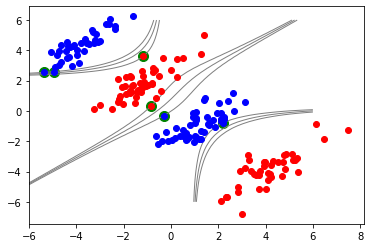

In [46]:
test_non_linear( kernel=polynomial_kernel )

     pcost       dcost       gap    pres   dres
 0: -5.5000e+01 -1.6563e+02  5e+02  2e+01  2e+00
 1: -8.4066e+01 -1.9746e+02  2e+02  5e+00  6e-01
 2: -1.0806e+02 -2.1946e+02  2e+02  4e+00  5e-01
 3: -1.3839e+02 -2.1223e+02  1e+02  2e+00  3e-01
 4: -1.6205e+02 -2.3694e+02  9e+01  1e+00  1e-01
 5: -2.0227e+02 -2.1235e+02  1e+01  4e-02  4e-03
 6: -2.0944e+02 -2.1026e+02  8e-01  4e-04  4e-05
 7: -2.1017e+02 -2.1018e+02  9e-03  4e-06  4e-07
 8: -2.1018e+02 -2.1018e+02  9e-05  4e-08  4e-09
Optimal solution found.
11 support vectors out of 180 points
20 out of 20 predictions correct


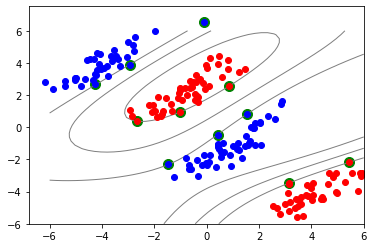

In [45]:
test_non_linear( kernel=gaussian_kernel )

     pcost       dcost       gap    pres   dres
 0: -3.5689e+01 -3.8953e+02  2e+03  3e+00  1e-14
 1: -2.0999e+01 -2.2421e+02  4e+02  4e-01  1e-14
 2: -1.0451e+01 -4.6230e+01  6e+01  4e-02  1e-14
 3: -9.3096e+00 -1.5427e+01  8e+00  5e-03  6e-15
 4: -1.0132e+01 -1.2481e+01  3e+00  2e-03  4e-15
 5: -1.0552e+01 -1.1292e+01  9e-01  3e-04  6e-15
 6: -1.0744e+01 -1.0919e+01  2e-01  7e-05  5e-15
 7: -1.0799e+01 -1.0810e+01  1e-02  1e-15  5e-15
 8: -1.0804e+01 -1.0805e+01  1e-04  5e-15  5e-15
 9: -1.0805e+01 -1.0805e+01  1e-06  2e-16  6e-15
Optimal solution found.
15 support vectors out of 180 points
19 out of 20 predictions correct


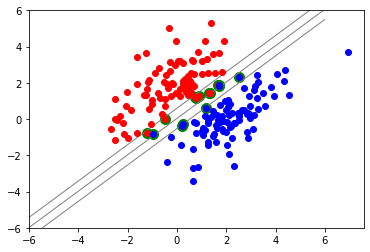

In [26]:
test_soft()